In [36]:
import allel
import subprocess, msprime, pyslim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random
import scipy.stats
import re
import pickle
import seaborn as sns
import matplotlib.backends.backend_pdf
cpal = ["#000000", "#1ce6ff", "#ff34ff", "#ff4a46", "#008941", "#006fa6", "#a30059","#ffdbe5", "#7a4900", "#0000a6", "#63ffac", "#b79762", "#004d43", "#8fb0ff", "#997d87","#5a0007", "#809693", "#1b4400", "#4fc601", "#3b5dff", "#4a3b53", "#ff2f80","#61615a", "#ba0900", "#6b7900", "#00c2a0", "#ffaa92", "#ff90c9", "#b903aa", "#d16100","#ddefff", "#000035", "#7b4f4b", "#a1c299", "#300018", "#0aa6d8", "#013349", "#00846f","#372101", "#ffb500", "#c2ffed", "#a079bf", "#cc0744", "#c0b9b2", "#c2ff99", "#001e09","#00489c", "#6f0062", "#0cbd66", "#eec3ff", "#456d75", "#b77b68", "#7a87a1", "#788d66","#885578", "#fad09f", "#ff8a9a", "#d157a0"]
sns.set_palette(sns.color_palette(cpal))
plt.rcParams['figure.figsize'] = [15, 10]

In [37]:
n_sims=5
n_pop=2
T=np.concatenate([np.arange(0,2.2,step=0.4), np.arange(4,11,step=2)])
T = [float("%.1f"%t) for t in T]
#path="/Users/murillo/Drive/phd/w19/rotation/mimulus/pkls/pis/"
#path2="/Users/murillo/Drive/phd/w19/rotation/mimulus/pkls/div/"
#path3="/Users/murillo/Drive/phd/w19/rotation/mimulus/pkls/"


path="/Users/murillo/Drive/phd/s19/mimulus_sims/pkls/pis/"
path2="/Users/murillo/Drive/phd/s19/mimulus_sims/pkls/div/"
path3="/Users/murillo/Drive/phd/s19/mimulus_sims/pkls/fst/"
markers=[]

In [38]:
col_names =  ['N', 'non_neutral_mu','rec', 'L', 'L0', 'L1', 'm', 'ndeff', 'nprop', 'pdeff', 'pprop','n_sim','localintro','label'] + list(map(lambda x: "corpi_T_"+str(x), T)) + list(map(lambda x: "corpidiv0_T_"+str(x), T)) + list(map(lambda x: "corpidiv1_T_"+str(x), T)) + list(map(lambda x: "corpifst0_T_"+str(x), T)) + list(map(lambda x: "corpifst1_T_"+str(x), T))
#col_names =  ['N', 'non_neutral_mu','rec', 'deff','L', 'L0', 'L1', 'm','n_sim'] + list(map(lambda x: "corpi_T_"+str(x), T)) + list(map(lambda x: "corpidiv0_T_"+str(x), T)) + list(map(lambda x: "corpidiv1_T_"+str(x), T))
my_df  = pd.DataFrame(columns = col_names)
print(my_df)
col_names =  ['N', 'non_neutral_mu','rec', 'L', 'L0', 'L1', 'm', 'ndeff', 'nprop', 'pdeff', 'pprop','n_sim','label','time','pop','win','pi']
pis_df = pd.DataFrame(columns = col_names)
col_names =  ['N', 'non_neutral_mu','rec', 'L', 'L0', 'L1', 'm', 'ndeff', 'nprop', 'pdeff', 'pprop','n_sim','label','time','win','div']
div_df = pd.DataFrame(columns = col_names)
fst_df = pd.DataFrame(columns = col_names[:-1]+['fst'])
print(pis_df.head())
print(div_df.head())
print(fst_df.head())





Empty DataFrame
Columns: [N, non_neutral_mu, rec, L, L0, L1, m, ndeff, nprop, pdeff, pprop, n_sim, localintro, label, corpi_T_0.0, corpi_T_0.4, corpi_T_0.8, corpi_T_1.2, corpi_T_1.6, corpi_T_2.0, corpi_T_4.0, corpi_T_6.0, corpi_T_8.0, corpi_T_10.0, corpidiv0_T_0.0, corpidiv0_T_0.4, corpidiv0_T_0.8, corpidiv0_T_1.2, corpidiv0_T_1.6, corpidiv0_T_2.0, corpidiv0_T_4.0, corpidiv0_T_6.0, corpidiv0_T_8.0, corpidiv0_T_10.0, corpidiv1_T_0.0, corpidiv1_T_0.4, corpidiv1_T_0.8, corpidiv1_T_1.2, corpidiv1_T_1.6, corpidiv1_T_2.0, corpidiv1_T_4.0, corpidiv1_T_6.0, corpidiv1_T_8.0, corpidiv1_T_10.0, corpifst0_T_0.0, corpifst0_T_0.4, corpifst0_T_0.8, corpifst0_T_1.2, corpifst0_T_1.6, corpifst0_T_2.0, corpifst0_T_4.0, corpifst0_T_6.0, corpifst0_T_8.0, corpifst0_T_10.0, corpifst1_T_0.0, corpifst1_T_0.4, corpifst1_T_0.8, corpifst1_T_1.2, corpifst1_T_1.6, corpifst1_T_2.0, corpifst1_T_4.0, corpifst1_T_6.0, corpifst1_T_8.0, corpifst1_T_10.0]
Index: []

[0 rows x 64 columns]
Empty DataFrame
Columns: [N, non_n

N_10000_mu_1.00e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0_ndeff_10.0_nprop_0.1_pdeff_0.0_pprop_0.0_pis.pkl
Neg -Ns=10.0 +Prop=0.1
-0.20638521999837942
-0.05113037841341869
-0.2934122032250223
0.3294031849063334
0.046758509067633
-0.052104858030694305
0.06052994084758123
0.020500769791751076
-0.05299623196279016
0.25662426059476545
-0.057128965647961875
0.07009156470302245
0.1619803905680253
-0.16385073551798426
0.21465904964744822
-0.12973016773357102
0.07608783729033304
0.2875779920589904
-0.43148853415444455
-0.05648069369734671
0.11125516570780328
-0.0446479215622721
-0.11636481513542304
-0.14116121724645334
0.0213110768981444
-0.03606012725296884
0.16813872457661452
-0.20331429051168273
0.001701782825685083
0.26748237582043594
-0.16644382332044497
-0.23847338141155497
-0.0290900251195203
-0.2208986671721192
-0.02179726116198039
-0.0235799367960457
-0.15866455991306289
0.023904059638603033
-0.3637468600599627
0.2008751316749048
0.0717961185306301
-0.1539770666589559
0.0533203

Pos +Ns=100.0 +Prop=0.001
0.09634941866017967
0.07900494287334901
0.07187424033708777
0.1642492504659266
-0.10282797180131271
0.1441594750180485
0.2956810631229236
0.17349378078338493
-0.020987804401166137
0.2994206071903817
0.13314424679050438
0.11255165707803258
-0.07997731140102099
0.23637615999305644
-0.18791021797261162
0.12673716634526577
-0.18540577787593865
-0.15565999513815737
0.03216919212381493
0.17737622558949842
0.02244550684709505
0.208492018475002
-0.13735261953658917
0.185803419495989
-0.035410420549388213
0.262620533182076
0.09747994489911678
0.044485860140993434
0.30598436069036034
0.017989546629570974
0.46843853820598014
0.10817599870350864
0.2000648245685115
0.2983671652706321
0.009642654566080544
0.11968235961429383
0.13248521189530835
0.08743567933922107
0.08613564540961026
-0.15565999513815737
0.20657239100719926
0.08338060124787294
-0.033465683494044246
0.038975771817518844
0.025038489587553687
-0.08589951405838991
0.36773226398645525
0.06522972206466252
0.02730

-0.08305647840531562
-0.4812608893379369
-0.13669880884855362
0.2342692761535571
-0.08184433376516524
0.1521008064130843
0.277309563309255
0.2191880722793939
0.1612576477155236
-0.06782545283311218
0.13912973016773358
0.08224617129892231
0.08743213677983956
-0.12706130232057336
-0.07187424033708777
-0.052102746941090676
0.12859573778462038
0.09342840936715015
-0.007859978932015234
0.10404764807373482
-0.17211620288832766
-0.17802447127461307
-0.13459746374647472
0.039786078923912165
0.13021635199740703
-0.06830888906895714
0.05307511546876267
-0.23929338377082474
-0.05607552372821222
N_10000_mu_5.10e-10_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0_ndeff_100.0_nprop_0.05_pdeff_100.0_pprop_0.001_pis.pkl
Both -Ns=100.0 -Propp=0.05 +Ns=100.0 +Prop=0.001
-0.13459746374647472
-0.10801393728222998
0.1161170083461632
0.10437178404904239
0.04675472003889475
-0.27574750830564787
-0.16044730777725463
0.45387139942444604
-0.05275099262620534
0.16019771493395998
0.09926262053318208
-0.2216189935985

0.00413273368517171
N_10000_mu_1.00e-09_r_2e-08_L_21000000_L0_7000000_L1_7000000_m_0_ndeff_100.0_nprop_0.1_pdeff_0.0_pprop_0.0_pis.pkl
Neg -Ns=100.0 +Prop=0.1
-0.02730845591966405
0.07446722307754639
0.05964343617639149
0.08022365388862732
0.44137428085244307
-0.3298893888692947
0.00024309213191799696
-0.12195616070947889
0.18142776112146503
0.1436732710550871
-0.18596548091726767
0.12349580659218992
0.023257698617696134
-0.2802965846472342
0.06587796774977717
-0.019448158518455105
-0.12025444683911407
-0.21247974137839465
-0.23863544283283364
-0.15906328498500935
-0.14496981495631742
-0.12551657078032574
0.08581152256705292
0.1849931123895957
0.0882424438862329
0.2867676849525971
-0.0918077951543635
0.1770521027469411
0.18354199601792004
-0.24365934689247226
0.07754639008184103
0.032655376387650925
0.29164134378299966
-0.07236335648741837
0.07187424033708777
-0.11903411392917915
0.10680280386384929
-0.3761597993444525
-0.21221943116441133
0.01191151446398185
0.26586176160764935
-0.112

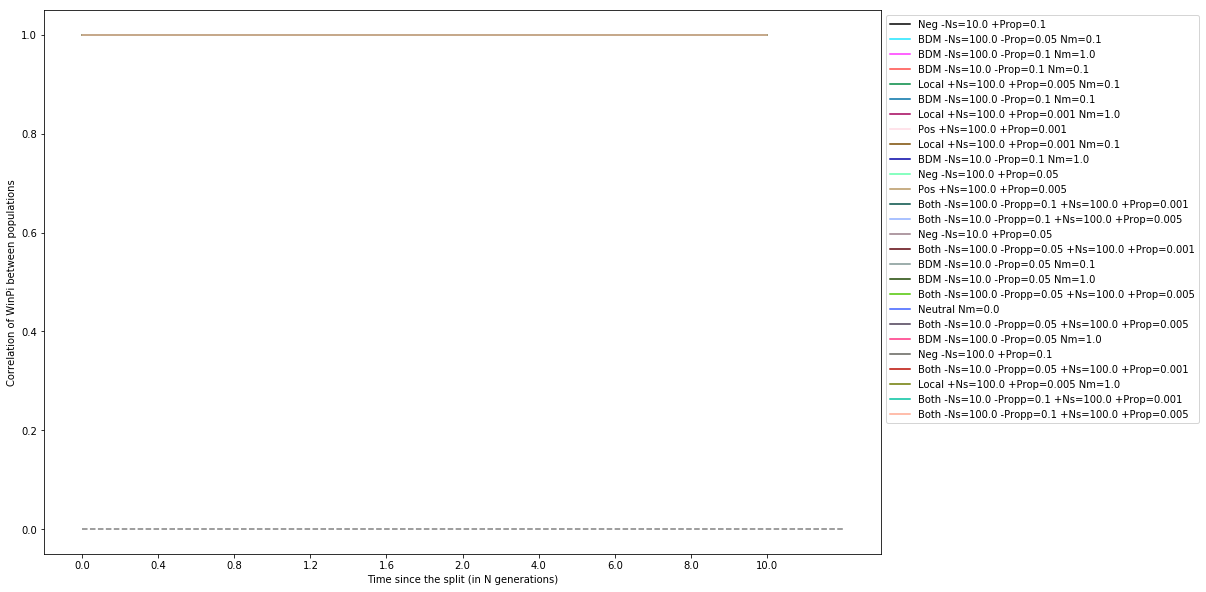

In [87]:
directory = os.fsencode(path)


for file in os.listdir(directory):
    #print(file)
    localintro=False
    filename = os.fsdecode(file)
    matches = re.match( r'N_(\d+)_mu_(.*)_r_(.*)_L_(\d+)_L0_(.+)_L1_(\d+)_m_(.+)_ndeff_(.+)_nprop_(.+)_pdeff_(.+)_pprop_(.+)_pis\.pkl', filename)
    if not matches:
        localintro=True
        matches = re.match( r'N_(\d+)_mu_(.*)_r_(.*)_L_(\d+)_L0_(.+)_L1_(\d+)_m_(.+)_deff_(.+)_pis\.pkl', filename)
        matches  = matches.groups()
        if(matches[1] in ['1.50e-10', '3.00e-11']):
            matches = matches[:-1]+(str(0),)+(str(0),)+(matches[-1],)+(str(float(matches[1])/3/1e-8),)
            print("LOCAL=",matches)
        else:
            matches = matches[:-1]+(matches[-1],)+(str(round(float(matches[1])*0.9/1e-8,2)),)+(str(0),)+(str(0),)
    else:
        matches  = matches.groups()
            
    #N, del_mut, r, L, L0, L1, m,ndeff,nprop,pdeff,pprop  = matches.groups()
    #del_mut, ndeff, nprop, pdeff, pprop = float(del_mut), float(ndeff), float(nprop), float(pdeff), float(pprop)
    #L, L0, L1 = int(L), int(L0),int(L1)
    matches = list(map(lambda x: float(x), matches))
    
    mpre = re.match( r'(N_.+)_pis\.pkl', filename)
    prefix = mpre.group(1)
    print(filename)
    pkl_file = open(path+filename, 'rb')
    pis = pickle.load(pkl_file)
    pkl_file.close()
    pkl_file = open(path2+prefix+"_div.pkl", 'rb')
    div = pickle.load(pkl_file)
    pkl_file.close()
    pkl_file = open(path3+prefix+"_fst.pkl", 'rb')
    fst = pickle.load(pkl_file)
    pkl_file.close()
    cor = np.zeros((len(T),n_sims))
    cor0 = np.zeros((len(T),n_sims))
    cor1 = np.zeros((len(T),n_sims))
    cor0f = np.zeros((len(T),n_sims))
    cor1f = np.zeros((len(T),n_sims))
    if not localintro:
        if matches[8] < 0.0001 and matches[10] < 0.0001:
            lb = "Neutral Nm="+str(matches[6])
        elif matches[8] < 0.0001:
            lb = "Pos +Ns="+str(matches[9])+" +Prop="+str(matches[10])
        elif matches[10] < 0.0001:
            lb = "Neg -Ns="+str(matches[7])+" +Prop="+str(matches[8])
        else:
            lb = "Both -Ns="+str(matches[7])+" -Propp="+str(matches[8])+" +Ns="+str(matches[9])+" +Prop="+str(matches[10])
    else:
        if(matches[1] in [1.50e-10, 3.00e-11]):
            lb = "Local +Ns="+str(matches[9])+" +Prop="+str(matches[10])+" Nm="+str(matches[6])
        else:
            lb = "BDM -Ns="+str(matches[7])+" -Prop="+str(matches[8])+" Nm="+str(matches[6])
    print(lb)
    for i in range(n_sims):
        for t in range(len(T)):
            cor[t,i] = scipy.stats.spearmanr(pis[t,i,:,:],axis = 1)[0]
            cor0[t,i] = scipy.stats.spearmanr(pis[t,i,0,:],div[t,i,0,:])[0]
            cor1[t,i] = scipy.stats.spearmanr(pis[t,i,1,:],div[t,i,0,:])[0]
            cor0f[t,i] = scipy.stats.spearmanr(pis[t,i,0,:],fst[t,i,0,:])[0]
            cor1f[t,i] = scipy.stats.spearmanr(pis[t,i,1,:],fst[t,i,0,:])[0]
            print(cor0f[t,i])
        my_df.loc[len(my_df)] = list(matches) + list([float(i)]) + list([localintro]) + list([lb]) + cor[:,i].tolist() + cor0[:,i].tolist() + cor1[:,i].tolist() + cor0f[:,i].tolist() + cor1f[:,i].tolist() 
    plt.plot(T,np.mean(cor0, axis = 1), label=lb)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
#handles, labels = plt.gca().get_legend_handles_labels()
#order = [3,5,2,1,4,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1,1))
plt.ylabel("Correlation of WinPi between populations")
plt.xlabel("Time since the split (in N generations)")
plt.hlines(y=0, xmin=0, xmax=10, linestyle="--", colors="gray")
plt.savefig(path3+"correlation_winpi_time.pdf", bbox_inches='tight')

In [59]:
my_df = my_df.sort_values(by=["label"])
filter_col = [col for col in my_df if col.startswith('cor')]
tmp = my_df[['label']+filter_col].groupby(['label'])
sim_means = tmp.mean()
sim_means

,corpi_T_0.0,corpi_T_0.4,corpi_T_0.8,corpi_T_1.2,corpi_T_1.6,corpi_T_2.0,corpi_T_4.0,corpi_T_6.0,corpi_T_8.0,corpi_T_10.0,...,corpifst1_T_0.0,corpifst1_T_0.4,corpifst1_T_0.8,corpifst1_T_1.2,corpifst1_T_1.6,corpifst1_T_2.0,corpifst1_T_4.0,corpifst1_T_6.0,corpifst1_T_8.0,corpifst1_T_10.0
label,,,,,,,,,,,,,,,,,,,,,
BDM -Ns=10.0 -Prop=0.05 Nm=0.1,0.998801,0.755449,0.600713,0.496378,0.442703,0.437841,0.330427,0.293607,0.302812,0.326440,...,-0.081599,0.078459,0.024567,-0.172097,0.011946,-0.004828,-0.001492,-0.036839,0.127773,0.006191
BDM -Ns=10.0 -Prop=0.05 Nm=1.0,0.998541,0.821343,0.770489,0.696362,0.699895,0.680998,0.700381,0.734835,0.774475,0.777846,...,-0.082201,-0.026042,0.024197,0.054680,0.002836,0.097209,-0.081008,0.081584,0.051863,0.023417
BDM -Ns=10.0 -Prop=0.1 Nm=0.1,0.998736,0.776906,0.740734,0.660060,0.592253,0.566745,0.547362,0.576371,0.571510,0.636075,...,0.044082,0.015396,0.004522,0.107610,-0.132990,0.021263,0.050515,-0.111064,0.127788,0.011491
BDM -Ns=10.0 -Prop=0.1 Nm=1.0,0.999060,0.890803,0.834633,0.862345,0.857191,0.811328,0.822705,0.771850,0.794506,0.803549,...,0.024163,-0.009093,-0.050669,-0.052070,0.050076,0.035329,-0.022285,-0.073740,-0.091016,-0.046773
BDM -Ns=100.0 -Prop=0.05 Nm=0.1,0.999092,0.722065,0.483834,0.517965,0.480593,0.412884,0.392172,0.456478,0.504157,0.425784,...,0.039623,0.072962,-0.086363,-0.029968,-0.013938,0.032462,-0.112489,-0.035894,0.070580,0.075861
BDM -Ns=100.0 -Prop=0.05 Nm=1.0,0.998768,0.796127,0.737298,0.731464,0.693477,0.670302,0.646188,0.645312,0.680804,0.690203,...,0.037082,0.026837,-0.019741,-0.003289,-0.049964,-0.140622,-0.008154,0.011522,0.080107,-0.140718
BDM -Ns=100.0 -Prop=0.1 Nm=0.1,0.999157,0.834438,0.722940,0.687643,0.658699,0.653253,0.571056,0.598606,0.584086,0.571380,...,0.077196,-0.028022,0.027733,0.012366,-0.094096,0.035118,0.069559,-0.068860,0.031037,0.058019
BDM -Ns=100.0 -Prop=0.1 Nm=1.0,0.998833,0.893947,0.818459,0.794960,0.788542,0.671696,0.684661,0.660384,0.640029,0.670335,...,-0.061295,0.101704,-0.060308,0.060044,0.021635,-0.059867,-0.051325,0.017471,-0.024472,0.035640
Both -Ns=10.0 -Propp=0.05 +Ns=100.0 +Prop=0.001,0.999546,0.820695,0.708840,0.705599,0.722162,0.684142,0.637890,0.660028,0.704205,0.650271,...,0.063757,0.090043,-0.007212,0.083333,0.111822,0.039414,0.076851,0.046219,0.016027,-0.006693


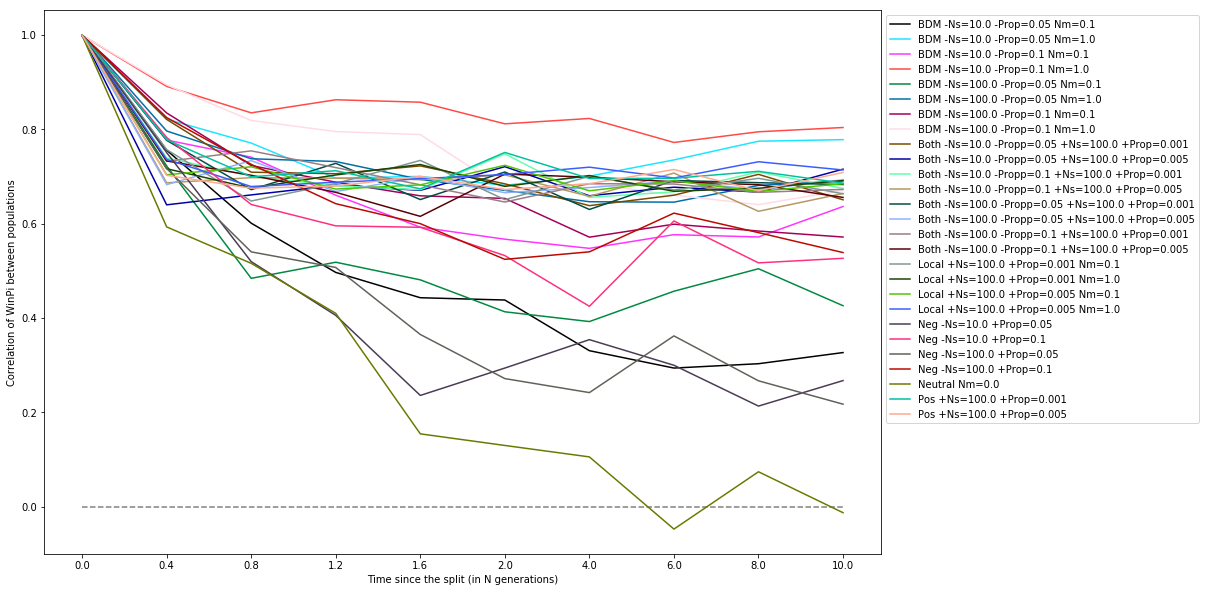

In [98]:
cols = [col for col in sim_means if col.startswith('corpi_')]
T = [col.split('_')[-1] for col in sim_means if col.startswith('corpi_')]
for index, row in sim_means.iterrows():
    plt.plot(T,row[cols], label=index)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel("Correlation of WinPi between populations")
plt.xlabel("Time since the split (in N generations)")
plt.hlines(y=0, xmin=0, xmax=9, linestyle="--", colors="gray")
#plt.savefig(path3+"correlation_winpi_time.pdf", bbox_inches='tight')

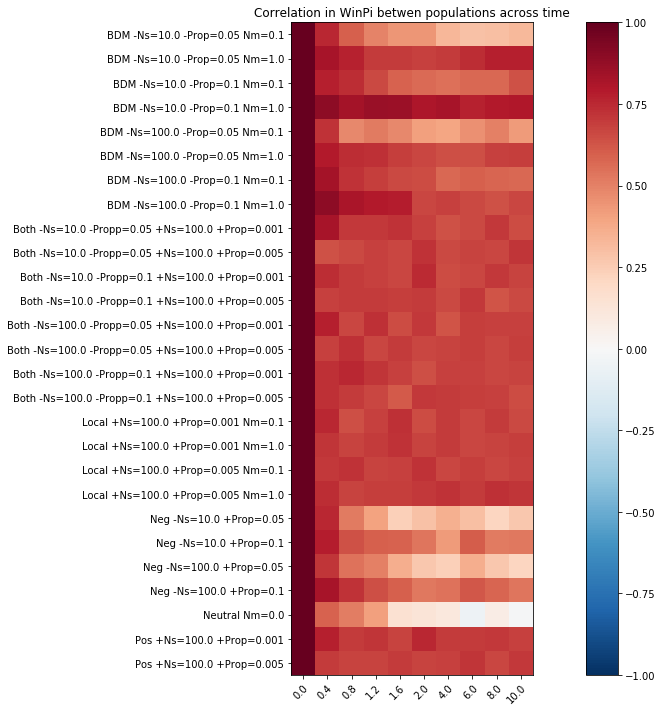

In [99]:
fig, ax = plt.subplots()
im = ax.imshow(sim_means[cols], cmap="RdBu_r", vmin=-1, vmax=1)
im = ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(T)))
ax.set_yticks(np.arange(len(sim_means.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(T)
ax.set_yticklabels(sim_means.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Correlation in WinPi betwen populations across time")
fig.tight_layout()
plt.show()

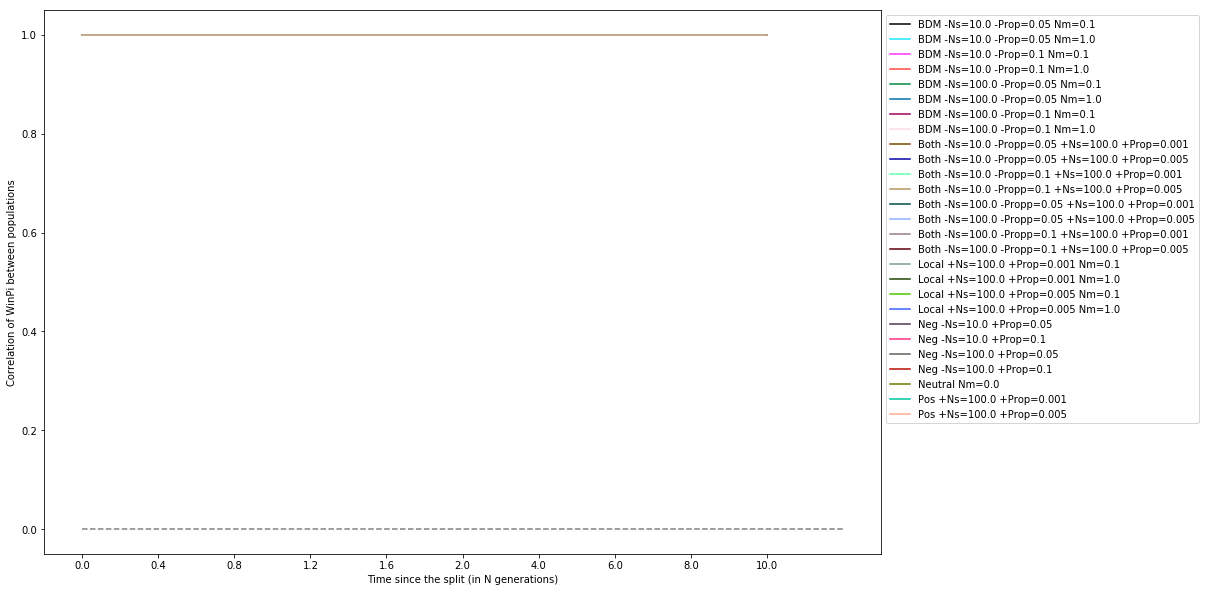

In [100]:
cols = [col for col in sim_means if col.startswith('corpi_')]
T = [col.split('_')[-1] for col in sim_means if col.startswith('corpi_')]
for index, row in sim_means.iterrows():
    plt.plot(T,row[cols], label=index)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.ylabel("Correlation of WinPi between populations")
plt.xlabel("Time since the split (in N generations)")
plt.hlines(y=0, xmin=0, xmax=9, linestyle="--", colors="gray")
#plt.savefig(path3+"correlation_winpi_time.pdf", bbox_inches='tight')

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages(path3+"landscapes.pdf")


fig, ax = plt.subplots(nrows=20, ncols=12, sharex=True, sharey=True, figsize=(40,40))
#for row in ax:
#    for col in row:
#        ax[0,0].plot(x, y)
ax[0, 0].set_ylim(mn, mx)

r=0
for name, group in grouped:
    print(parse_param(name))
    pi0win = group[[col for col in group if col.startswith('pi0_win')]]
    pi1win = group[[col for col in group if col.startswith('pi1_win')]]
    divwin = group[[col for col in group if col.startswith('div_win')]]
    for c in range(len(pi0win.index)):
        ax[r,c].plot(pi0win.iloc[c].tolist())
        ax[r,c].plot(pi1win.iloc[c].tolist(), color="red")
        ax[r,c].plot(divwin.iloc[c].tolist(), color="blue")
    r +=1
plt.show()